In [1]:
import pandas_datareader as pdr
import pandas as pd
from datetime import datetime
import warnings
warnings.filterwarnings("ignore")

In [2]:
df_tesla = pd.read_csv(r"C:\Users\sarav\Downloads\TSLA.csv")
df_tesla.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2016-08-16,45.098000,45.438000,44.681999,44.722000,44.722000,11335500
1,2016-08-17,44.866001,44.966000,44.560001,44.647999,44.647999,8935500
2,2016-08-18,44.764000,45.132000,44.458000,44.702000,44.702000,8572500
3,2016-08-19,44.708000,45.034000,44.506001,45.000000,45.000000,8297500
4,2016-08-22,44.834000,45.021999,44.535999,44.585999,44.585999,10327500


In [3]:
df_tesla.shape

(1258, 7)

In [4]:
df_tesla=df_tesla.set_index("Date")

In [5]:
df_tesla.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2016-08-16,45.098000,45.438000,44.681999,44.722000,44.722000,11335500
2016-08-17,44.866001,44.966000,44.560001,44.647999,44.647999,8935500
2016-08-18,44.764000,45.132000,44.458000,44.702000,44.702000,8572500
2016-08-19,44.708000,45.034000,44.506001,45.000000,45.000000,8297500
2016-08-22,44.834000,45.021999,44.535999,44.585999,44.585999,10327500


Simple moving average

1. rolling() is used to calculate simple moving average
2. rolling function has two arguments namely windows and min_period
3. windows says about the size , min_period about how many NaN values to be present

<AxesSubplot: xlabel='Date'>

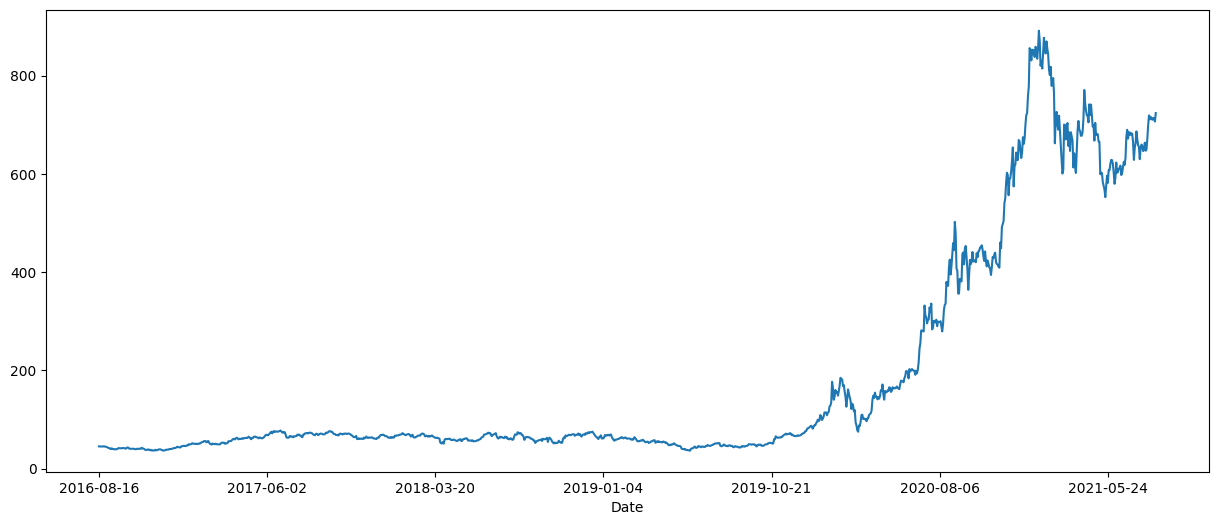

In [6]:
df_tesla['Open'].plot(figsize=(15,6))

In [7]:
df_tesla['Open:10 rolling days'] = df_tesla['Open'].rolling(window=10,min_periods=1).mean()

<AxesSubplot: xlabel='Date'>

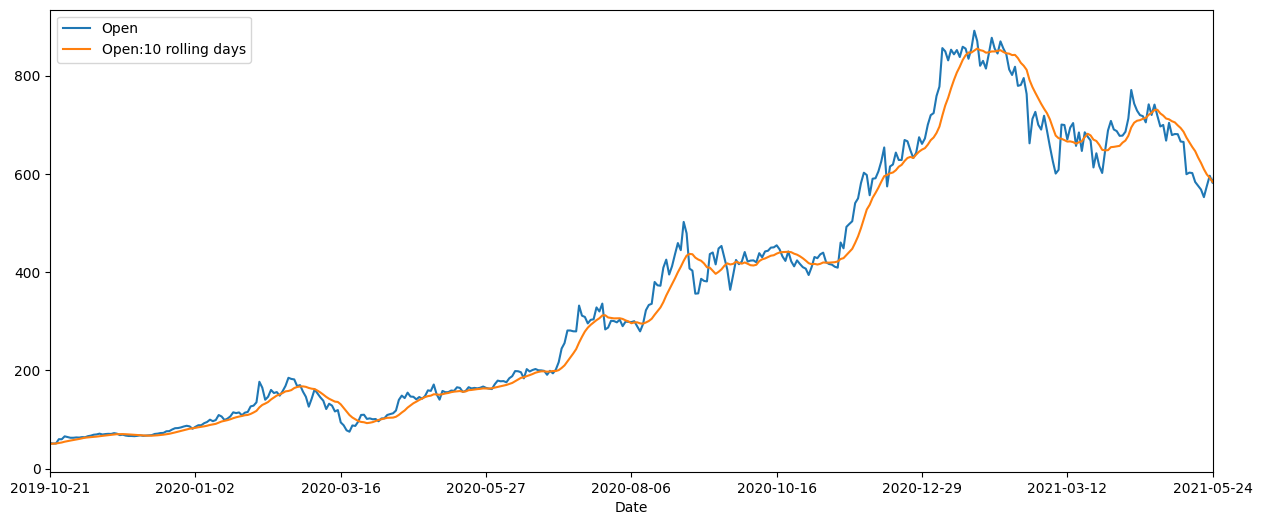

In [8]:
df_tesla[['Open','Open:10 rolling days']].plot(xlim=[800,1200],figsize=(15,6))

Cummulative Moving Average

1. add all the vlues one by one and find the average
2. expanding() adds the values in a cummulative manner

<AxesSubplot: xlabel='Date'>

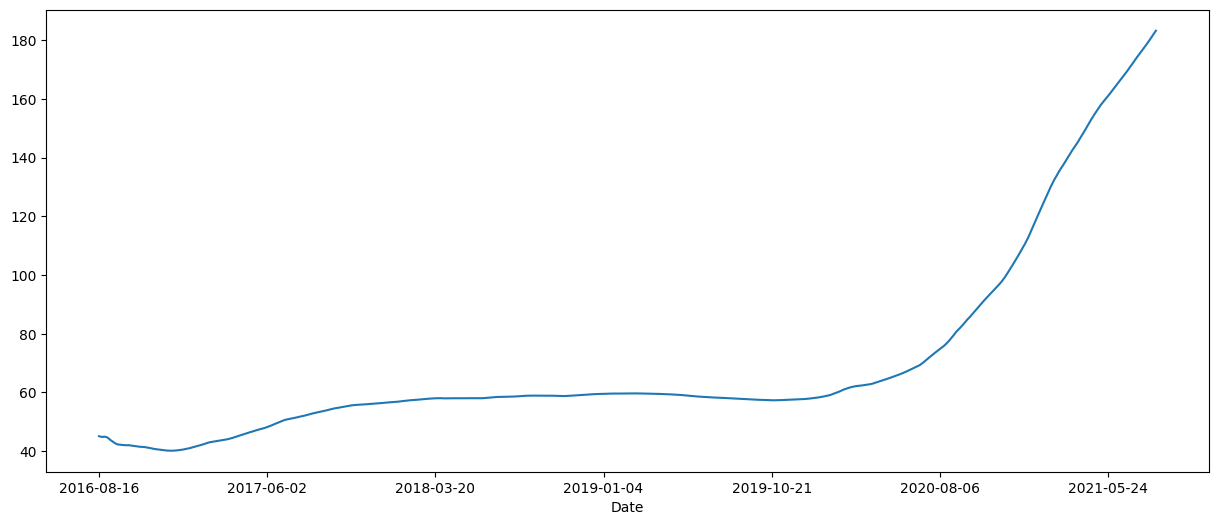

In [9]:
df_tesla['Open'].expanding().mean().plot(figsize=(15,6))

Exponential weighted moving average:
1. EWMA -- focus must be on the recent data
2. EWMA = ((data-prev EWMA)*multiplier)+prev EWMA

****for the first window consider SMA value for prev EWMA
multiplier=(2/(window+1))

EWMA(t) = a*data(t) + (1-a)*EWMA(t-1)

In [10]:
df_tesla['EMA_0.3']=df_tesla['Open'].ewm(alpha=0.3, adjust=False).mean()
#exponential moving average 
# alpha = smoothing factor

<AxesSubplot: xlabel='Date'>

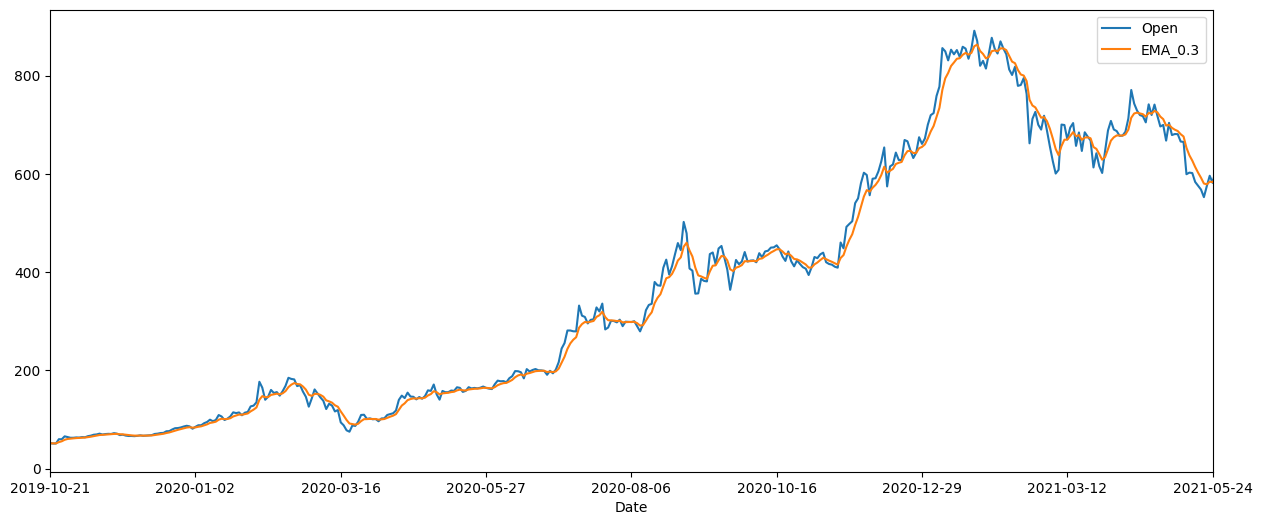

In [11]:
df_tesla[['Open','EMA_0.3']].plot(xlim=[800,1200],figsize=(15,6))

In [12]:
df_tesla['EMA_5days']=df_tesla['Open'].ewm(span=5, adjust=False).mean()
# create 5 day exponential weighted moving average
## alpha = 2/(span+1) multiplier
#span is the window

<AxesSubplot: xlabel='Date'>

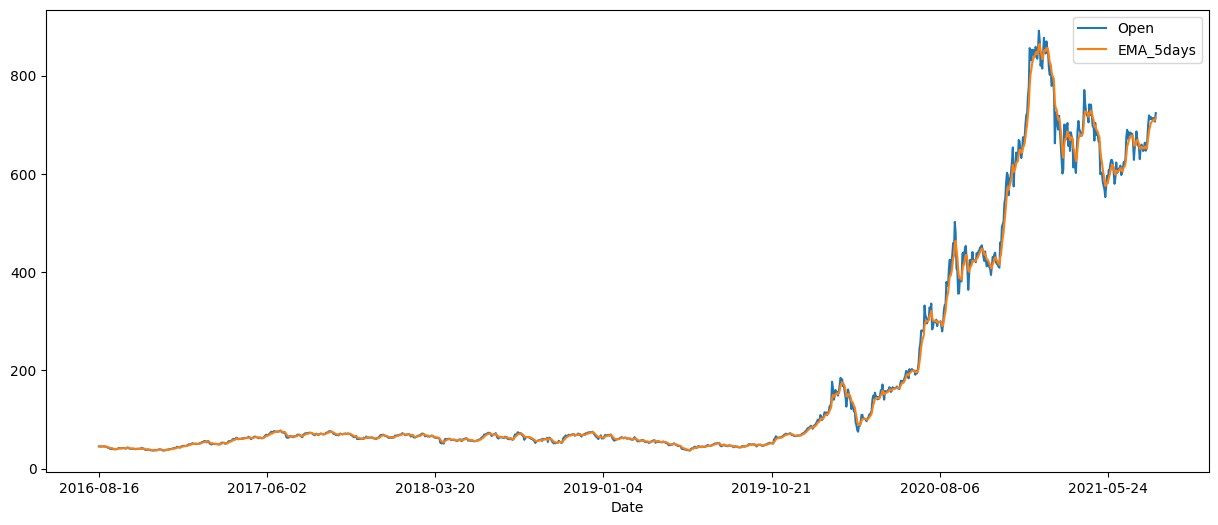

In [13]:
df_tesla[['Open','EMA_5days']].plot(figsize=(15,6))

ARIMA
1. AR=AutoRegressive
2. MA=Moving Average
3. I

ARMA = is good for Sales,production monthly

Moving Average Models:
        mean=10,@1=coeffient term=0.5, E=error term(mean=0,SD=1)
        MA = mean+(@1*E(t-1))

ARIMA = AR + I + MA

1. AR is done by using PACF plot
2. MA is done by using ACF plot
3. I is done by using Differencing
* we use plots to find the hyperparameterwhich gives the number of previous data to be considered.
* PACF is plot b/w lags and correlation
1. P - number of lags which have corelation above a certain value
2. d - no of times we are differencing
3. q - 

1. check for stationary data(Dickey fuller test)
    h0 = unit root =1 -> Data is not stationary
    h1 = unit root <1 -> data is stationary
    p < 0.05 null rejected(stationary)
    p >= 0.05 null hypothesis is accepted(not stationary)
2. if not stationary , we have to make it stationary by using differencing


In [14]:
df=pd.read_csv(r"C:\Users\sarav\Downloads\archive (1)\AirPassengers.csv")
df.head()

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121


In [15]:
import statsmodels.api as sms

In [16]:
df.isnull().sum()

Month          0
#Passengers    0
dtype: int64

In [17]:
df.shape

(144, 2)

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Month        144 non-null    object
 1   #Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [19]:
df['Month']=pd.to_datetime(df['Month'])

In [20]:
df.set_index('Month',inplace=True)
df.head()

,#Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


<AxesSubplot: xlabel='Month'>

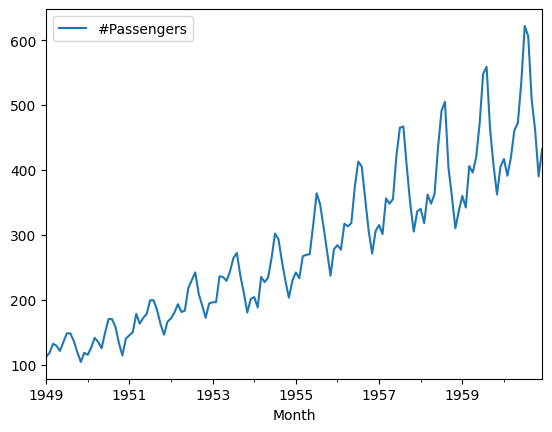

In [21]:
df.plot()

In [22]:
from statsmodels.tsa.stattools import adfuller

In [23]:
#dickey fuller test
def ADF_test(series):
    result=adfuller(series)
    print('ADF statistics: {}'.format(result[0]))
    print('p-value: {}'.format(result[1]))
    if result[1] <= 0.05:
        print('reject null hypothesis and data is stationary')
    else:
        print('accept null hypothesis and data is not stationary')

In [24]:
ADF_test(df['#Passengers'])

ADF statistics: 0.8153688792060482
p-value: 0.991880243437641
accept null hypothesis and data is not stationary


we must do differencing to make it stationary

In [25]:
df['pass_diff']=df['#Passengers']-df['#Passengers'].shift(1)
# we have to shift the values by one row to indicate it is at time t-1

In [26]:
df.head()

,#Passengers,pass_diff
Month,,
1949-01-01,112,NaN
1949-02-01,118,6.0
1949-03-01,132,14.0
1949-04-01,129,-3.0
1949-05-01,121,-8.0


In [27]:
ADF_test(df['pass_diff'].dropna())

ADF statistics: -2.8292668241699994
p-value: 0.0542132902838255
accept null hypothesis and data is not stationary


In [28]:
df['sec_diff']=df['pass_diff']-df['pass_diff'].shift(1)

In [29]:
ADF_test(df['sec_diff'].dropna())

ADF statistics: -16.384231542468505
p-value: 2.7328918500142407e-29
reject null hypothesis and data is stationary


In [30]:
df['Season_diff']=df['#Passengers']-df['#Passengers'].shift(12)
#for 12 months difference for seasonal data

In [31]:
ADF_test(df['Season_diff'].dropna())

ADF statistics: -3.383020726492481
p-value: 0.011551493085514954
reject null hypothesis and data is stationary


In [32]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

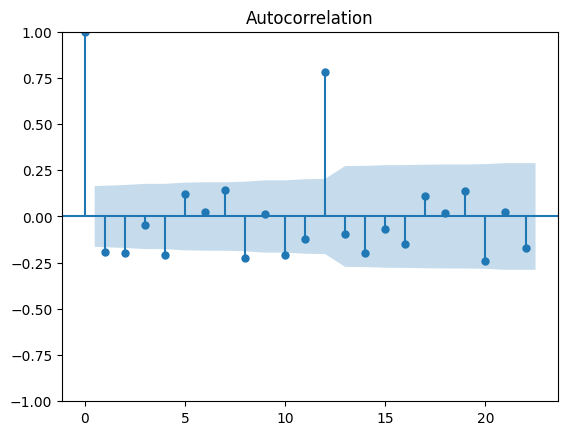

In [33]:
result=plot_acf(df['sec_diff'].dropna())
# we take q=13 based on the plot since this has 12 lags it can be considered as seasonal trend

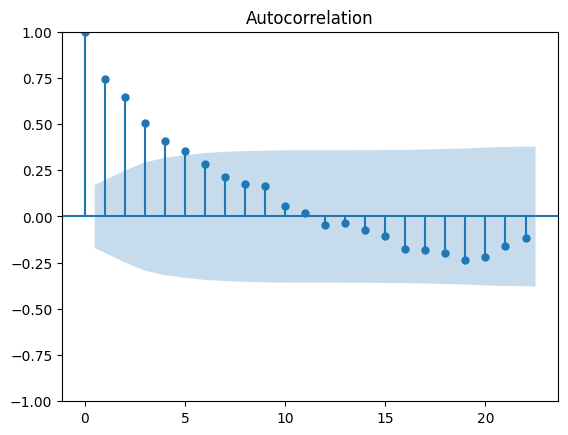

In [34]:
result12=plot_acf(df['Season_diff'].dropna())
#so we check the trend of seasonal differencing, we found that q=5 

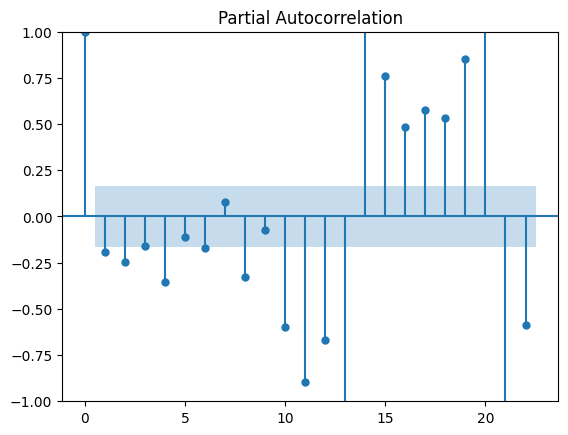

In [35]:
pacf=plot_pacf(df['sec_diff'].dropna())

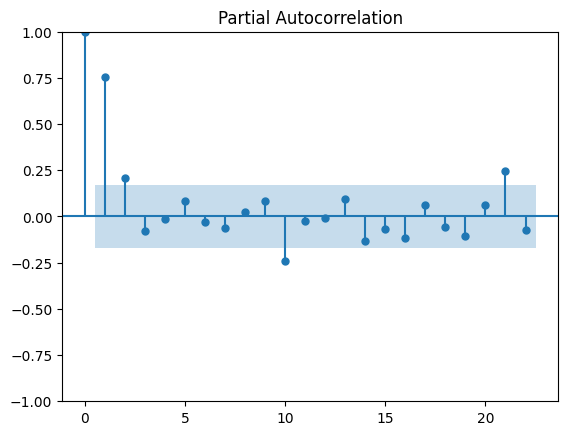

In [36]:
pacf12=plot_pacf(df['Season_diff'].dropna())
# in the above graph we could not get a proper p value
# so we try the seasonal differencing plot and found p to be p=2 or p=10

In [37]:
df.head(15)

,#Passengers,pass_diff,sec_diff,Season_diff
Month,,,,
1949-01-01,112,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN
1949-03-01,132,14.0,8.0,NaN
1949-04-01,129,-3.0,-17.0,NaN
1949-05-01,121,-8.0,-5.0,NaN
1949-06-01,135,14.0,22.0,NaN
1949-07-01,148,13.0,-1.0,NaN
1949-08-01,148,0.0,-13.0,NaN
1949-09-01,136,-12.0,-12.0,NaN


In [38]:
from datetime import datetime, timedelta
train_dataset_end=datetime(1955,12,1)
test_dataset_end=datetime(1960,12,1)

In [39]:
train_data=df[:train_dataset_end]
test_data=df[train_dataset_end+timedelta(days=1):test_dataset_end]

In [40]:
pred_start=test_data.index[0]
pred_end=test_data.index[-1]

In [41]:
test_data

,#Passengers,pass_diff,sec_diff,Season_diff
Month,,,,
1956-01-01,284,6.0,-35.0,42.0
1956-02-01,277,-7.0,-13.0,44.0
1956-03-01,317,40.0,47.0,50.0
1956-04-01,313,-4.0,-44.0,44.0
1956-05-01,318,5.0,9.0,48.0
1956-06-01,374,56.0,51.0,59.0
1956-07-01,413,39.0,-17.0,49.0
1956-08-01,405,-8.0,-47.0,58.0
1956-09-01,355,-50.0,-42.0,43.0


In [42]:
from statsmodels.tsa.arima.model import ARIMA

In [43]:
model=ARIMA(train_data['#Passengers'],order=(14,2,12))
model_arima=model.fit()

c:\Users\sarav\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sarav\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sarav\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sarav\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [44]:
model_arima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:            #Passengers   No. Observations:                   84
Model:               ARIMA(14, 2, 12)   Log Likelihood                -306.049
Date:                Fri, 10 Feb 2023   AIC                            666.097
Time:                        12:00:33   BIC                            731.079
Sample:                    01-01-1949   HQIC                           692.186
                         - 12-01-1955                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7417      5.593     -0.133      0.894     -11.704      10.220
ar.L2         -0.2026      9.056     -0.022      0.982     -17.951      17.546
ar.L3         -0.2550      9.077     -0.028      0.978     -18.046      17.536
ar.L4         -0.2469      8.989     -0.027      0.978     -17.865      17.371
ar.L5         -0.2915      8.863     -0.033      0.974     -17.663      17.080
ar.L6         -0.1971      8.972     -0.022      0.982     -17.781      17.387
ar.L7         -0.2634      8.558     -0.031      0.975     -17.037      16.510
ar.L8         -0.3339      8.564     -0.039      0.969     -17.120      16.452
ar.L9         -0.2617      8.987     -0.029      0.977     -17.875      17.352
ar.L10        -0.2968      8.951     -0.033      0.974     -17.840      17.247
ar.L11        -0.1215      9.088     -0.013      0.989     -17.934      17.691
ar.L12         0.5780      8.273      0.070      0.944     -15.637      16.794
ar.L13         0.5039      3.780      0.133      0.894      -6.905       7.913
ar.L14        -0.0673      0.489     -0.138      0.890      -1.025       0.891
ma.L1         -0.4302      5.622     -0.077      0.939     -11.449      10.589
ma.L2         -0.5973      2.739     -0.218      0.827      -5.965       4.771
ma.L3         -0.0807      1.332     -0.061      0.952      -2.691       2.530
ma.L4          0.1334      1.995      0.067      0.947      -3.777       4.043
ma.L5          0.2006      1.062      0.189      0.850      -1.880       2.282
ma.L6         -0.2717      0.559     -0.486      0.627      -1.368       0.824
ma.L7          0.2250      1.147      0.196      0.844      -2.022       2.472
ma.L8         -0.2830      0.539     -0.525      0.600      -1.340       0.774
ma.L9          0.2500      1.410      0.177      0.859      -2.513       3.013
ma.L10        -0.1053      0.709     -0.148      0.882      -1.495       1.285
ma.L11        -0.3111      0.748     -0.416      0.678      -1.778       1.155
ma.L12         0.2992      1.867      0.160      0.873      -3.361       3.959
sigma2        73.4711     28.074      2.617      0.009      18.447     128.495
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 3.46
Prob(Q):                              0.80   Prob(JB):                         0.18
Heteroskedasticity (H):               2.14   Skew:                             0.50
Prob(H) (two-sided):                  0.05   Kurtosis:                         2.96
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [45]:
pred_start=test_data.index[0]
pred_end=test_data.index[-1]
print(pred_start)
print(pred_end)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [46]:
pred=model_arima.predict(start=pred_start,end=pred_end)
residuals=test_data['#Passengers']-pred

In [47]:
residuals

Month
1956-01-01      0.096685
1956-02-01     -3.436236
1956-03-01     25.832753
1956-04-01      9.666854
1956-05-01     16.320849
1956-06-01     29.284822
1956-07-01     18.944266
1956-08-01     35.522306
1956-09-01     11.184631
1956-10-01      1.118881
1956-11-01     -1.431615
1956-12-01      2.729206
1957-01-01     -3.155705
1957-02-01     -4.091185
1957-03-01     38.218192
1957-04-01     21.456741
1957-05-01     22.984403
1957-06-01     45.811987
1957-07-01     45.705980
1957-08-01     68.953445
1957-09-01     34.724791
1957-10-01     11.521780
1957-11-01     -1.897818
1957-12-01      3.623160
1958-01-01     -8.731177
1958-02-01    -15.490452
1958-03-01     20.079073
1958-04-01     -4.892175
1958-05-01      1.621857
1958-06-01     27.555241
1958-07-01     45.848367
1958-08-01     79.168186
1958-09-01      8.293513
1958-10-01     -6.881608
1958-11-01    -30.984546
1958-12-01    -25.552705
1959-01-01    -18.218739
1959-02-01    -20.081997
1959-03-01     39.508885
1959-04-01     16.6

<AxesSubplot: ylabel='Density'>

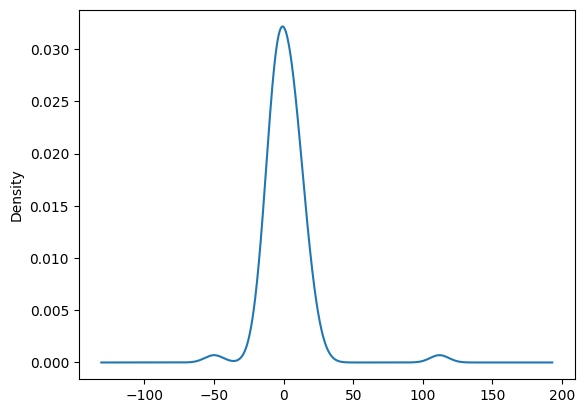

In [48]:
model_arima.resid.plot(kind='kde')

In [49]:
test_data['pred_arima']=pred

<AxesSubplot: xlabel='Month'>

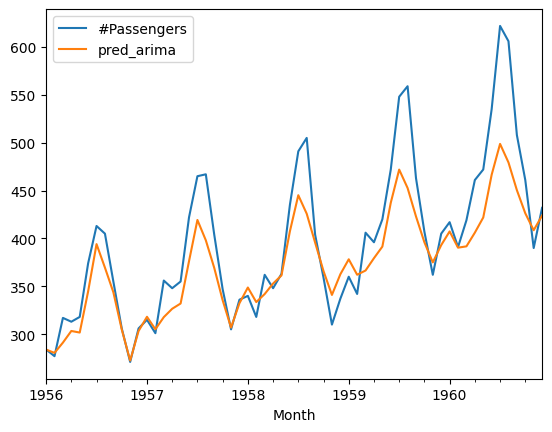

In [50]:
test_data[['#Passengers','pred_arima']].plot()

SARIMAX

In [51]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [52]:
model_sarmax=SARIMAX(train_data['#Passengers'],order=(2,1,5),seasonal_order=(2,1,5,12))

c:\Users\sarav\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
c:\Users\sarav\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [53]:
model_sarmax_fot=model_sarmax.fit()

c:\Users\sarav\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\base\model.py:604: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [54]:
model_sarmax_fot.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                        #Passengers   No. Observations:                   84
Model:             SARIMAX(2, 1, 5)x(2, 1, 5, 12)   Log Likelihood                -257.142
Date:                            Fri, 10 Feb 2023   AIC                            544.283
Time:                                    12:00:59   BIC                            578.224
Sample:                                01-01-1949   HQIC                           557.780
                                     - 12-01-1955                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3296      3.194     -0.103      0.918      -6.589       5.930
ar.L2          0.5869      3.129      0.188      0.851      -5.546       6.720
ma.L1          0.0713      3.070      0.023      0.981      -5.946       6.088
ma.L2         -0.6352      2.637     -0.241      0.810      -5.804       4.534
ma.L3         -0.0399      0.806     -0.049      0.961      -1.619       1.539
ma.L4         -0.1338      0.430     -0.311      0.756      -0.977       0.710
ma.L5          0.1870      0.797      0.235      0.814      -1.374       1.748
ar.S.L12      -0.1625      8.506     -0.019      0.985     -16.833      16.508
ar.S.L24      -0.0274     32.721     -0.001      0.999     -64.159      64.104
ma.S.L12      -0.0118    773.457  -1.52e-05      1.000   -1515.960    1515.936
ma.S.L24       0.1043   1937.421   5.38e-05      1.000   -3797.171    3797.379
ma.S.L36       0.1025   1898.972    5.4e-05      1.000   -3721.815    3722.020
ma.S.L48      -0.0265    765.368  -3.46e-05      1.000   -1500.121    1500.068
ma.S.L60       0.9799    121.824      0.008      0.994    -237.790     239.750
sigma2        43.0975   5562.187      0.008      0.994   -1.09e+04    1.09e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 1.94
Prob(Q):                              0.94   Prob(JB):                         0.38
Heteroskedasticity (H):               2.32   Skew:                             0.40
Prob(H) (two-sided):                  0.04   Kurtosis:                         2.91
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [55]:
pred_Sarmax=model_sarmax_fot.predict(start=pred_start,end=pred_end)

In [56]:
residuals=test_data['#Passengers']-pred_Sarmax

<AxesSubplot: ylabel='Density'>

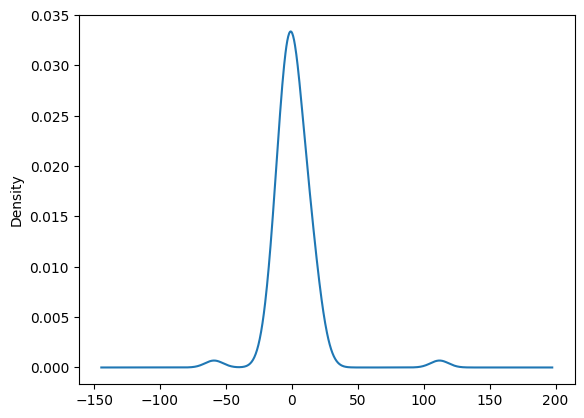

In [57]:
model_sarmax_fot.resid.plot(kind='kde')

In [58]:
test_data['pred_sarimax']=pred_Sarmax

<AxesSubplot: xlabel='Month'>

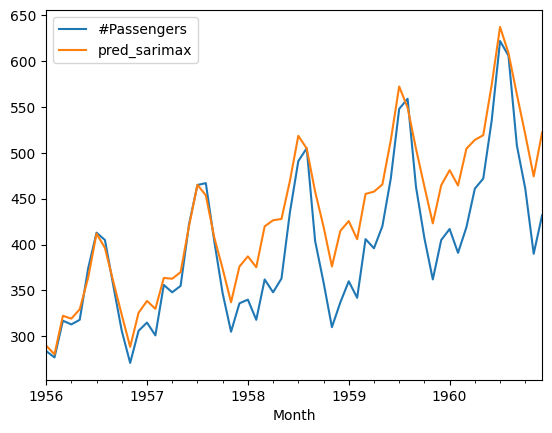

In [59]:
test_data[['#Passengers','pred_sarimax']].plot()

In [69]:
from sklearn.metrics import mean_absolute_percentage_error

print('SARIMAX has a MAPE score:',mean_absolute_percentage_error(test_data['#Passengers'],test_data['pred_sarimax']))

SARIMAX has a MAPE score: 0.09532042554990033


In [60]:
from pandas.tseries.offsets import DateOffset

In [61]:
future_months = [df.index[-1]+ DateOffset(months=x) for x in range(0,24)]

In [62]:
future_df=pd.DataFrame(index=future_months[1:],columns=df.columns)
future_df.tail()

,#Passengers,pass_diff,sec_diff,Season_diff
1962-07-01,NaN,NaN,NaN,NaN
1962-08-01,NaN,NaN,NaN,NaN
1962-09-01,NaN,NaN,NaN,NaN
1962-10-01,NaN,NaN,NaN,NaN
1962-11-01,NaN,NaN,NaN,NaN


In [63]:
future_data=pd.concat([df,future_df])

In [64]:
future_data.iloc[144]

#Passengers    NaN
pass_diff      NaN
sec_diff       NaN
Season_diff    NaN
Name: 1961-01-01 00:00:00, dtype: object

In [65]:
future_data['forcast']=model_sarmax_fot.predict(start=144, end=165, dynamic=True)

c:\Users\sarav\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\statespace\kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


In [66]:
future_data

,#Passengers,pass_diff,sec_diff,Season_diff,forcast
1949-01-01,112,NaN,NaN,NaN,NaN
1949-02-01,118,6.0,NaN,NaN,NaN
1949-03-01,132,14.0,8.0,NaN,NaN
1949-04-01,129,-3.0,-17.0,NaN,NaN
1949-05-01,121,-8.0,-5.0,NaN,NaN
...,...,...,...,...,...
1962-07-01,NaN,NaN,NaN,NaN,745.671836
1962-08-01,NaN,NaN,NaN,NaN,719.229156
1962-09-01,NaN,NaN,NaN,NaN,673.292058
1962-10-01,NaN,NaN,NaN,NaN,630.844876


<AxesSubplot: >

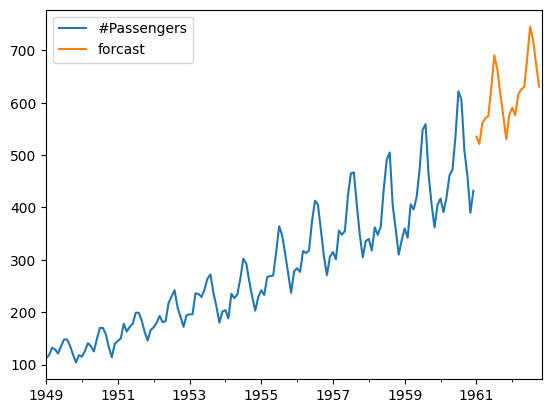

In [67]:
future_data[['#Passengers','forcast']].plot()

Since the model has both trend and seasonality we try holtwinters method also

<AxesSubplot: xlabel='Month'>

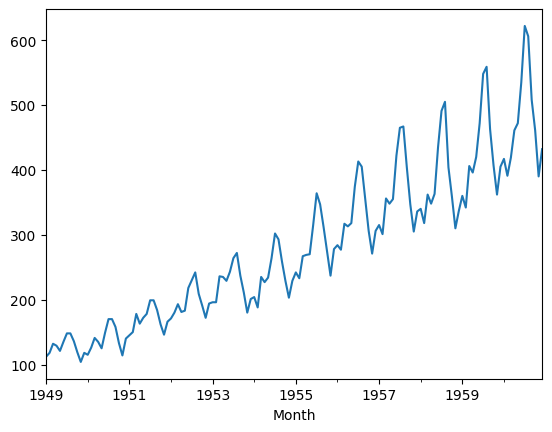

In [71]:
df['#Passengers'].plot()

From the plot we can see that the data has both multiplicative trend and multiplicative seasonality.

In [72]:
df.isnull().sum()

#Passengers     0
pass_diff       1
sec_diff        2
Season_diff    12
dtype: int64

In [76]:
new=df['#Passengers']

In [79]:
new_df=pd.DataFrame(new)

In [142]:
new_df.tail()

,#Passengers,hw_pred
Month,,
1960-08-01,606,NaN
1960-09-01,508,NaN
1960-10-01,461,NaN
1960-11-01,390,NaN
1960-12-01,432,NaN


In [81]:
new_df.shape

(144, 1)

In [83]:
train=new_df[:108]
test=new_df[109:]

In [84]:
train.tail()

,#Passengers
Month,
1957-08-01,467
1957-09-01,404
1957-10-01,347
1957-11-01,305
1957-12-01,336


In [86]:
test.tail()

,#Passengers
Month,
1960-08-01,606
1960-09-01,508
1960-10-01,461
1960-11-01,390
1960-12-01,432


In [87]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [123]:
hwmodel=ExponentialSmoothing(train['#Passengers'],trend='mul',seasonal='mul',seasonal_periods=12).fit()

c:\Users\sarav\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [127]:
test_hw_pred=hwmodel.forecast(len(test))

<AxesSubplot: xlabel='Month'>

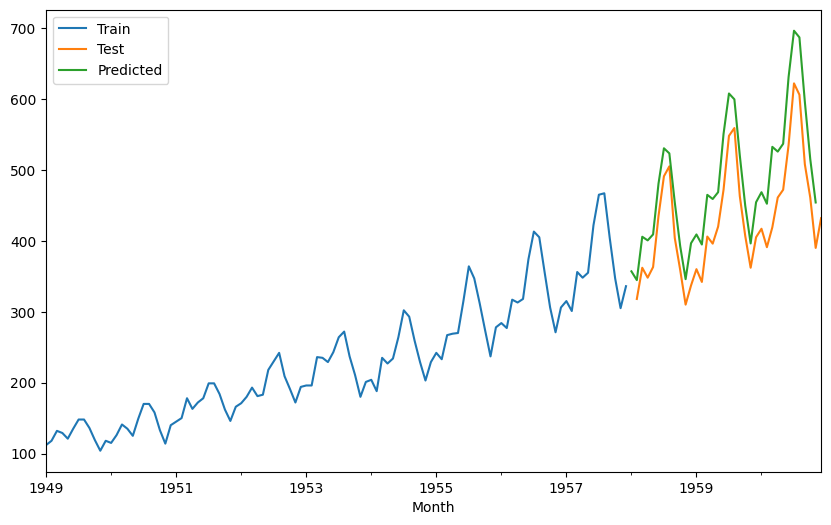

In [128]:
train['#Passengers'].plot(legend=True,label='Train',figsize=(10,6))
test['#Passengers'].plot(legend=True,label='Test')
test_hw_pred.plot(legend=True,label='Predicted')

In [129]:
print("Holtwinters method has a score:",mean_absolute_percentage_error(test,test_hw_pred))

Holtwinters method has a score: 0.13636206122943953


In [136]:
final_model=ExponentialSmoothing(new_df['#Passengers'],trend='mul',seasonal='mul').fit()

c:\Users\sarav\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [139]:
hw_pred= final_model.forecast(36)

<AxesSubplot: xlabel='Month'>

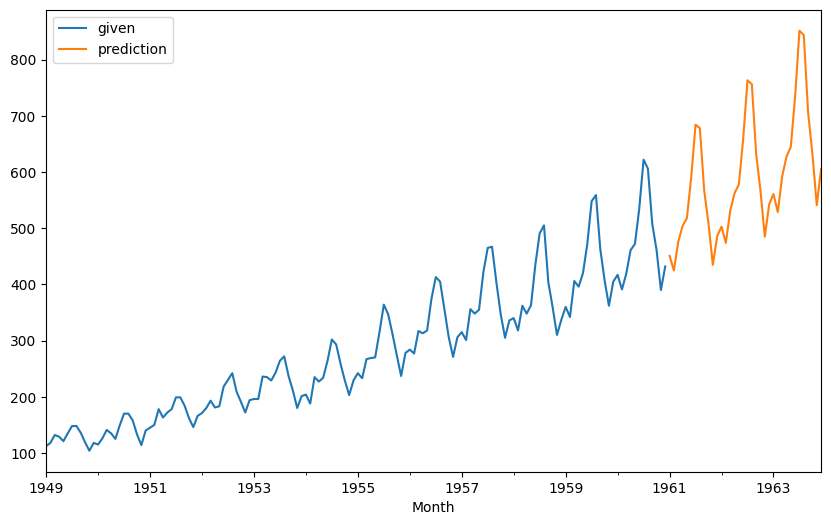

In [141]:
new_df['#Passengers'].plot(legend=True,label='given',figsize=(10,6))
hw_pred.plot(legend=True,label='prediction')